In [38]:
import umap
import pandas as pd
import os

raw_dir = './raws'
ex_dir = './processed'

train = pd.read_csv(os.path.join(raw_dir, 'train.csv'))
test = pd.read_csv(os.path.join(raw_dir, 'test.csv'))

train.replace(['A', 'B'], [0, 1], inplace=True)
train.fillna(train.loc[:, 'AB':'GL'].median(), inplace=True)
train

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0


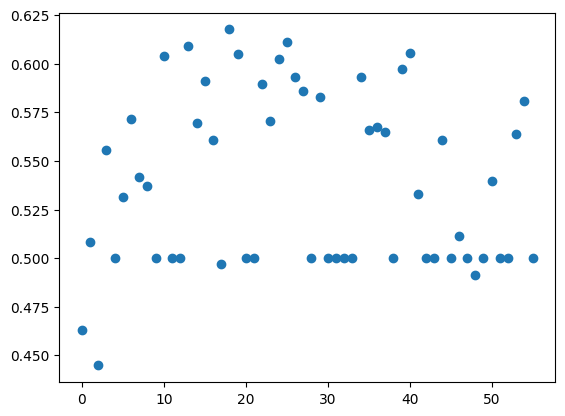

In [53]:
import umap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

rand = 0
ll = list()

for n in range(len(train.columns)-2):
    um = umap.UMAP(n_components=n+1, n_neighbors=15, random_state=rand)
    y = train['Class']
    x = train.drop(columns=['Id', 'Class'])
    x_rd = um.fit_transform(x)

    tr_x, va_x, tr_y, va_y = train_test_split(x_rd, y, test_size=0.3, random_state=rand)

    model = Perceptron()
    model.fit(tr_x, tr_y)
    va_pred = model.predict(va_x)

    ll.append([n, roc_auc_score(va_y, va_pred)])

df = pd.DataFrame(ll)
plt.scatter(df.loc[:, 0], df.loc[:, 1])
plt.show()

/home/kenshirou/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


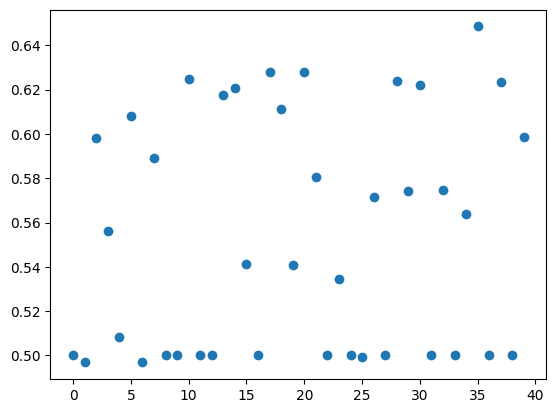

In [57]:
import umap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

rand = 0
ll = list()

for n in range(40):
    um = umap.UMAP(n_components=19, n_neighbors=n+2, random_state=rand)
    y = train['Class']
    x = train.drop(columns=['Id', 'Class'])
    x_rd = um.fit_transform(x)

    tr_x, va_x, tr_y, va_y = train_test_split(x_rd, y, test_size=0.3, random_state=rand)

    model = Perceptron()
    model.fit(tr_x, tr_y)
    va_pred = model.predict(va_x)

    ll.append([n, roc_auc_score(va_y, va_pred)])

df = pd.DataFrame(ll)
plt.scatter(df.loc[:, 0], df.loc[:, 1])
plt.show()